## Gradient Descent part 2 using two variables

In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score


In [2]:
X, Y = make_regression(n_samples= 100, n_features=1, n_informative=1, n_targets=1,noise=20, random_state=23)

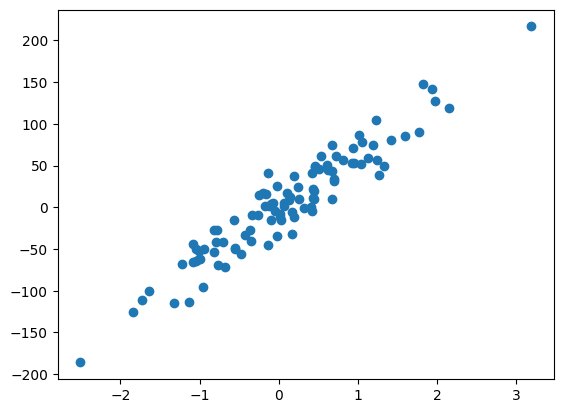

In [3]:
plt.scatter(X,Y)

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
lr = LinearRegression()

In [8]:
lr.fit(X_train,y_train)
print(lr.coef_)
print(lr.intercept_)

[64.04214709]
0.6285036036527849


In [9]:
y_pred = lr.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred) 

0.8815536677677318

In [10]:
class GDRegressor:

    def __init__(self, learning_rate, epochs):
        self.m = 100
        self.b = -120
        self.lr = learning_rate
        self.epochs = epochs
    
    def fit(self, X, Y):
        # calcualte the b using GD 
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum(Y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum((Y - self.m*X.ravel() - self.b) * X.ravel())

            self.b = self.b - (self.lr * loss_slope_b)
            self.m = self.m - (self.lr * loss_slope_m)
        print(self.m, self.b)

    def predict(self,X):
        return self.m * X + self.b
    


In [14]:
gd = GDRegressor(0.01, 50)

In [15]:
gd.fit(X_train, y_train)

64.0421368883851 0.6284877185085639


In [16]:
y_pred = gd.predict(X_test)
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.881553745671555